In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

from google.colab import drive
drive.mount("/content/drive")
!cd drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
tokenizer = Tokenizer()


data = open('shakespeare.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [12]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [13]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 15s 32ms/step - loss: 6.9048 - accuracy: 0.0226
Epoch 2/100
484/484 [==============================] - 16s 32ms/step - loss: 6.4987 - accuracy: 0.0207
Epoch 3/100
484/484 [==============================] - 15s 32ms/step - loss: 6.3889 - accuracy: 0.0244
Epoch 4/100
484/484 [==============================] - 15s 32ms/step - loss: 6.2537 - accuracy: 0.0332
Epoch 5/100
484/484 [==============================] - 15s 32ms/step - loss: 6.1556 - accuracy: 0.0379
Epoch 6/100
484/484 [==============================] - 15s 32ms/step - loss: 6.0670 - accuracy: 0.0391
Epoch 7/100
484/484 [==============================] - 15s 32ms/step - loss: 5.9782 - accuracy: 0.0424
Epoch 8/100
484/484 [==============================] - 16s 32ms/step - loss: 5.8727 - accuracy: 0.0509
Epoch 9/100
484/484 [==============================] - 15s 32ms/step - loss: 5.7514 - accuracy: 0.0566
Epoch 10/100
484/484 [==============================] - 15s 32ms/step - l

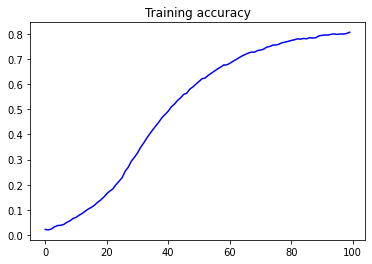

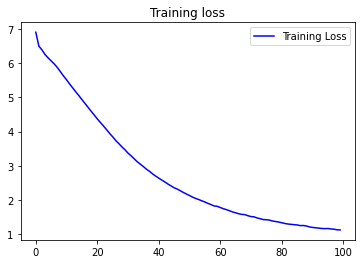

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [19]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope will read my purpose both heaven so dumb shame well contains kind are every pen bright bright prove life held light kind bright moan ill wrong new show devise none twain twain show thee tongue pain be mine eyes so counted fair that hearts spent shall grow kill men lie so live to ride be hell of men lend worms ill ill lies bright spent bright spent grow new spent grow dead lie to thee men so nothing hell new heir friend bear life more bright delight delight friend nearly quite green give store gone of men to catch life
